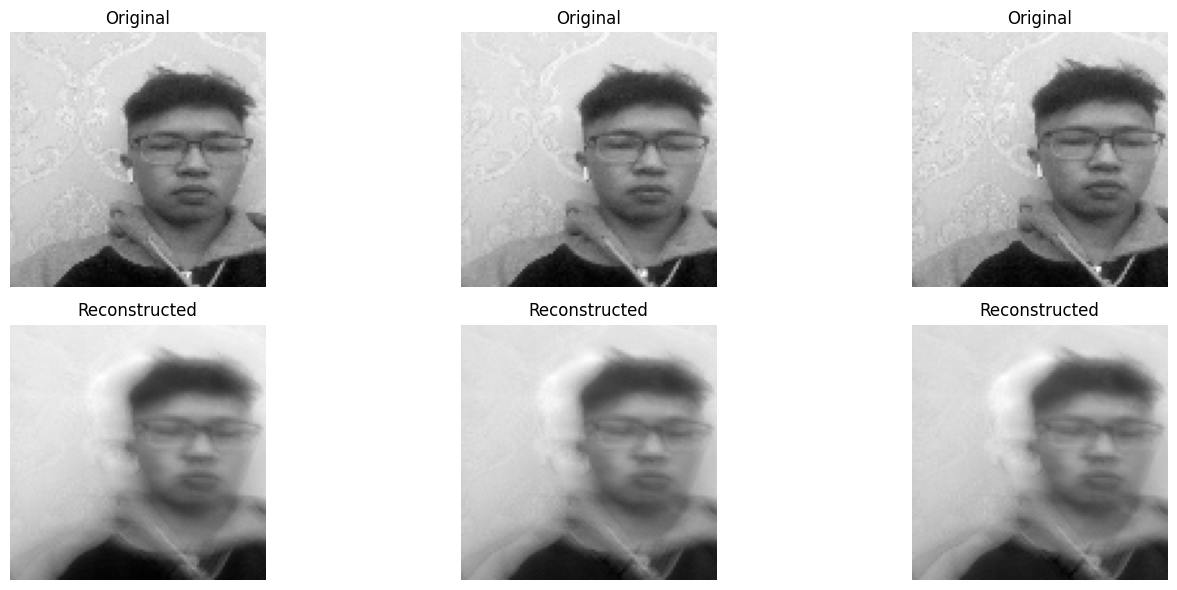

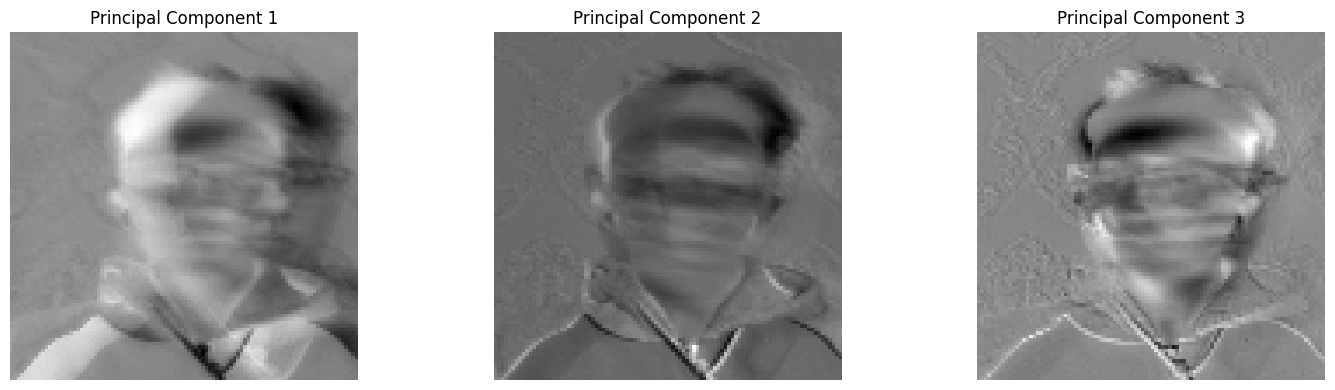

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_and_preprocess_images(folder_path, img_size=(100, 100)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        if os.path.isfile(img_path) and img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    images.append(img.flatten())
                else:
                    print(f"Error loading {img_path}. Skipping this image.")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}. Skipping this image.")
        else:
            print(f"Skipping non-image file: {img_path}")

    return np.array(images)

def apply_pca(images, n_components=50):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(images)
    reconstructed_images = pca.inverse_transform(pca_result)
    return pca_result, reconstructed_images, pca.components_

def display_images(original_images, reconstructed_images, img_size=(100, 100), num_images=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(img_size), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i].reshape(img_size), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def display_pca_components(components, img_size=(100, 100), num_components=3):
    plt.figure(figsize=(15, 4))
    for i in range(num_components):
        plt.subplot(1, num_components, i + 1)
        plt.imshow(components[i].reshape(img_size), cmap='gray')
        plt.title(f'Principal Component {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

folder_path = "zurag"

images = load_and_preprocess_images(folder_path)

n_components = 3
pca_result, reconstructed_images, pca_components = apply_pca(images, n_components)

num_images_to_display = 3
display_images(images, reconstructed_images, num_images=num_images_to_display)

display_pca_components(pca_components, num_components=n_components)

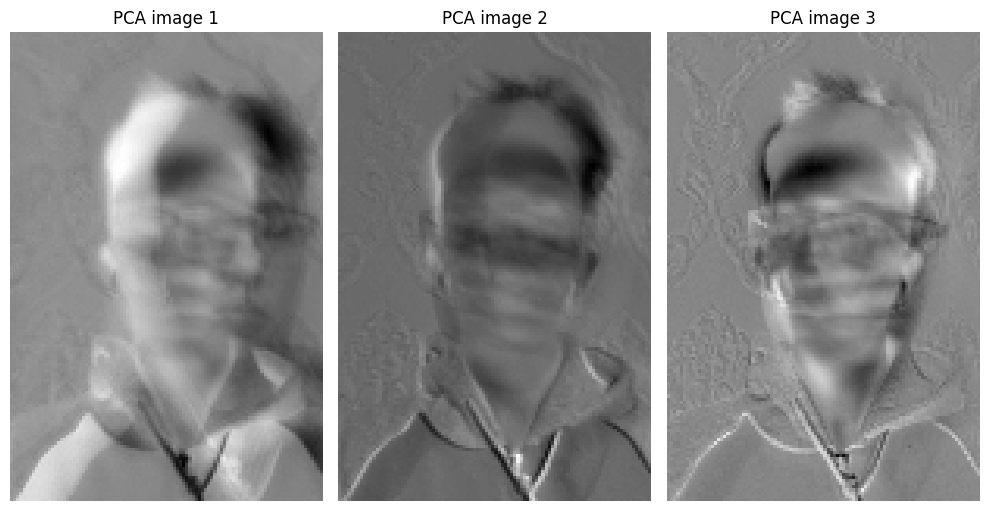

In [2]:
import numpy as np
import cv2
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

def load_and_resize_images(folder, width, height):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (width, height))
            images.append(img)
    return images

image_folder = 'zurag'
target_width = 100
target_height = 150
images = load_and_resize_images(image_folder, target_width, target_height)

gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
flattened_images = [img.flatten() for img in gray_images]

data = np.array(flattened_images)

pca = PCA(n_components=3)
pca.fit(data)

principal_components = pca.components_.reshape(-1, target_height, target_width)

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(principal_components[i], cmap='gray')
    plt.title(f'PCA image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()